## Unsupervised Learning with Scikit-Learn
* Dimensionality Reduction
* KMeans Clustering

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [33]:
%matplotlib inline

In [34]:
from sklearn.datasets import load_iris

In [35]:
#instantiating the dataset
iris = load_iris()

In [36]:
#viewing the data
iris.data

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1],
       [ 5.4,  3.7,  1.5,  0.2],
       [ 4.8,  3.4,  1.6,  0.2],
       [ 4.8,  3. ,  1.4,  0.1],
       [ 4.3,  3. ,  1.1,  0.1],
       [ 5.8,  4. ,  1.2,  0.2],
       [ 5.7,  4.4,  1.5,  0.4],
       [ 5.4,  3.9,  1.3,  0.4],
       [ 5.1,  3.5,  1.4,  0.3],
       [ 5.7,  3.8,  1.7,  0.3],
       [ 5.1,  3.8,  1.5,  0.3],
       [ 5.4,  3.4,  1.7,  0.2],
       [ 5.1,  3.7,  1.5,  0.4],
       [ 4.6,  3.6,  1. ,  0.2],
       [ 5.1,  3.3,  1.7,  0.5],
       [ 4.8,  3.4,  1.9,  0.2],
       [ 5. ,  3. ,  1.6,  0.2],
       [ 5. ,  3.4,  1.6,  0.4],
       [ 5.2,  3.5,  1.5,  0.2],
       [ 5.2,  3.4,  1.4,  0.2],
       [ 4.7,  3.2,  1.6,  0.2],
       [ 4

In [37]:
#display feature names
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [38]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [39]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'],
      dtype='<U10')

In [40]:
X = pd.DataFrame(data=iris.data, columns=['sepal_length','sepal_width','petal_length','petal_width'])
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Visualizing the data
Let's visualize it with a scatterplot

Text(0.5,1,'Petal')

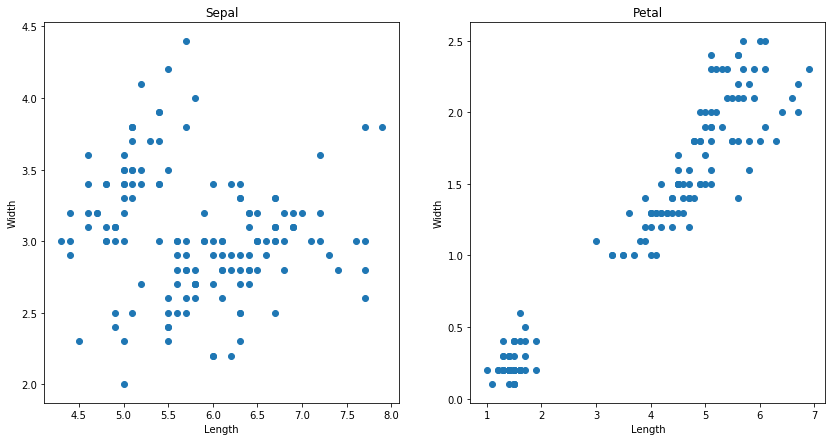

In [41]:
#setting size of scatterplot
plt.figure(figsize=(14,7))

# Plot Sepal
plt.subplot(1, 2, 1) # Creating subplots (1st subplot of 1 row, 2 columns)

# Produce a scatter plot for the sepal length and width 
plt.scatter(X['sepal_length'], X['sepal_width'])
plt.xlabel('Length')
plt.ylabel('Width')

plt.title('Sepal')
 
plt.subplot(1, 2, 2)
# Produce a scatter plot for the petal length and width 
plt.scatter(X['petal_length'], X['petal_width'])
plt.xlabel('Length')
plt.ylabel('Width')

plt.title('Petal')

### Dealing with many dimensions with Principal Component Analysis(PCA)
The sheer size of data in the modern age is not only a challenge for computer hardware but also a main bottleneck for the performance of many machine learning algorithms. 

The main goal of a PCA analysis is to identify patterns in data; PCA aims to detect the correlation between variables. If a strong correlation between variables exists, the attempt to reduce the dimensionality only makes sense. In a nutshell, this is what PCA is all about: Finding the directions of maximum variance in high-dimensional data and project it onto a smaller dimensional subspace while retaining most of the information.

#### Variance of PCA features
The iris dataset is 4-dimensional. But what is its intrinsic dimension? (Intrinsic dimension = number of features needed to approximate the dataset) Make a plot of the variances of the PCA features to find out. You'll need to standardize the features first.



In [42]:
# Perform the necessary imports
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Create scaler: scaler
scaler = StandardScaler()

# Fit_transform scaler to 'X'
X_scaled = scaler.fit_transform(X)

# Create a PCA instance: pca
pca = PCA()

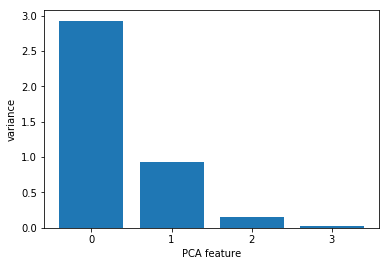

In [43]:
# Fit pca to 'X'
pca.fit(X_scaled)

# Plot the explained variances
features = range(0, pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

Looking at your plot, what do you think would be a reasonable choice for the "intrinsic dimension" of the the iris dataset? Recall that the intrinsic dimension is the number of PCA features with significant variance.

### Dimension reduction of the iris dataset
We found that the "intrinsic dimension" to be some  k < 4 of the iris dataset. Now use PCA for dimensionality reduction of the iris dataset, retaining only the 2 most important components.


In [44]:
# Create a PCA model with 2 components: pca
pca = PCA(n_components=2)

# Fit the PCA instance to the scaled samples
pca.fit(X_scaled)

# Transform the scaled samples: pca_features
pca_features = pca.transform(X_scaled)

# Print the shape of pca_features
print(pca_features.shape)

(150, 2)


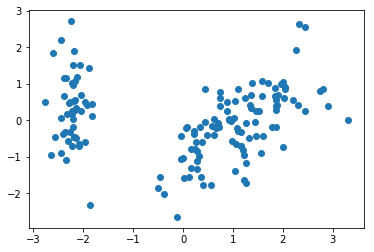

In [45]:
plt.scatter(pca_features[:, 0], pca_features[:, 1])

### Kmeans Clustering
Kmeans clustering is an unsupervised learning technique to automatically group data into coherent clusters.

Input: The model will take in training data 

Output: Cluster centroids and the labels for each data point. 

The labels tell us which clusters they belong to

#### A summary of the algorithm
* Randomly intialize K cluster centroids.

* While the centroid positions are not the same,
     * For each data point, say x, find the cluster centroid closest to x.
     * Update cluster centers using data points assigned to them.

In [46]:
# Import KMeans
from sklearn.cluster import KMeans

# Create a KMeans instance with 3 clusters: model
km = KMeans(n_clusters=3)

# Fit model to points
km.fit(X_scaled)

# Determine the cluster labels of new_points: labels
labels = km.labels_

# Print cluster labels of new_points
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0,
       2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2,
       0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

### Comparing with Iris Dataset
Let's transform the target column to take the names of the species instead of numbers

In [47]:
#creating a dictionary of target names with numbers.
species_dict = dict(zip(range(0, len(iris.target_names)), iris.target_names))
species_dict

{0: 'setosa', 1: 'versicolor', 2: 'virginica'}

In [48]:
species_dict[0]

'setosa'

In [49]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [27]:
iris_species = list((map(lambda x : species_dict[x], iris.target)))
iris_species

['setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',


In [50]:
pca_df = pd.DataFrame(data=pca_features)
pca_df.head()

,0,1
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


In [57]:
# Create a KMeans model with 3 clusters: model
km = KMeans(n_clusters=3)

# Use fit_predict to fit model and obtain cluster labels: labels
labels = km.fit_predict(X_scaled)

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'species': iris_species})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['species'])

# Display ct
print(ct)

species  setosa  versicolor  virginica
labels                                
0             0          39         17
1            50           0          0
2             0          11         33


In [58]:
# Create a KMeans model with 3 clusters: model
km = KMeans(n_clusters=3)

# Use fit_predict to fit model and obtain cluster labels: labels
labels = km.fit_predict(pca_features)

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'species': iris_species})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['species'])

# Display ct
print(ct)

species  setosa  versicolor  virginica
labels                                
0             0          11         36
1            50           0          0
2             0          39         14


### Inertia

* Inertia measures clustering quality
* Measures how spread out the clusters are (lower is better)
* Distance from each sample to centroid of its cluster
* Afer fit(), available as attribute inertia_
* k-means attempts to minimize the inertia when choosing clusters

In [54]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3)
model.fit(X_scaled)
print(model.inertia_)

140.965816631


In [59]:
model = KMeans(n_clusters=3)
model.fit(pca_features)
print(model.inertia_)

116.109240214


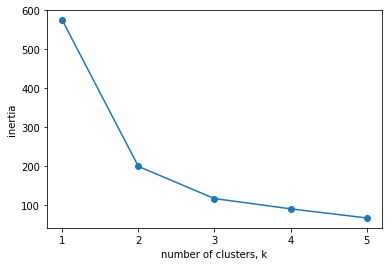

In [31]:
ks = range(1, 6)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(pca_features)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

### The Elbow